In [233]:
import seaborn as sns

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from osprey.config import Config

## Get Trial Databases

In [235]:
config = Config('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-2/alpha_angle.yaml')
df1 = config.trial_results()
df1['strategy'] = 'fixed'
config = Config('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-CSE/alpha_angle.yaml')
df2 = config.trial_results()
df2['strategy'] = 'csp'


# df1 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_0-159.pickl')
# df2 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_160-end.pickl')
df = pd.concat([df1, df2])
df.to_pickle('Random-var-all.pickl')

Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-2/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-CSE/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [236]:
print(df.shape)
df.head()
df.rename(columns={'project_name': 'feature'}, inplace=True)
df.columns


(6819, 18)


Index(['completed', 'config_sha1', 'elapsed', 'host', 'id', 'mean_test_score',
       'mean_train_score', 'n_test_samples', 'n_train_samples', 'parameters',
       'feature', 'started', 'status', 'test_scores', 'traceback',
       'train_scores', 'user', 'strategy'],
      dtype='object')

In [237]:
df = df.loc[:,['id', 'feature', 'parameters', 'test_scores', 'train_scores', 'strategy']]
df.shape

(6819, 6)

In [238]:
df.reset_index(inplace=True, drop=True)
df.sort_index()

,id,feature,parameters,test_scores,train_scores,strategy
0,1,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.977152429810875, 2.9909674944247566, 2.9662...","[2.988860204149737, 2.9987766501032995, 2.9960...",fixed
1,2,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.953804573511941, 2.946792661204334, 2.97513...","[2.9998938576712026, 2.9995053860291425, 2.999...",fixed
2,3,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.9896072802469207, 2.7900464723106633, 2.997...","[2.999816341015027, 2.994605618457376, 2.99977...",fixed
3,4,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.9746196809816787, 2.9806604040291518, 2.892...","[2.999655835689648, 2.99996471637393, 2.999711...",fixed
4,5,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.9787622984525073, 2.950281301722762, 2.9654...","[2.998880342228884, 2.9995641203003856, 2.9995...",fixed
5,6,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.9906312652722096, 2.9667600620811183, 2.990...","[2.999582148884225, 2.9999638011144265, 2.9979...",fixed
6,7,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.958370022410409, 2.9956106638508615, 2.9601...","[2.9998318846815804, 2.9998498199704735, 2.999...",fixed
7,8,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.87212283184966, 2.971220781209908, 2.950344...","[2.998977337824213, 2.999876657788278, 2.99991...",fixed
8,9,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.5096001462032214, 2.9969915746027076, 2.979...","[2.9995731132902526, 2.9997609617065595, 2.999...",fixed
9,10,alpha_angle,"{'tica__commute_mapping': False, 'msm__prior_c...","[2.955601702506344, 2.989656463436264, 2.93276...","[2.996175908876496, 2.9991231508706537, 2.9997...",fixed


## Locate errors

In [239]:
def has_error(x):
    return np.any(np.isnan(x))

In [240]:
df['error'] = (df['test_scores'].apply(has_error) | df['train_scores'].apply(has_error))


In [241]:
print(df.shape)
df = df.loc[~df['error'], :]
del df['error']
print(df.shape)

(6819, 7)
(6819, 6)


## Extract optimized parameters

In [242]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time', 'variance_cut__threshold']
for param in params:
    df[param] = df.loc[:, 'parameters'].apply(lambda x: x[param])

In [243]:
df.drop(labels='parameters', axis=1, inplace=True)
df.sort_values(inplace=True, by='id', axis=0)

In [244]:
df.head()

,id,feature,test_scores,train_scores,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold
0,1,alpha_angle,"[2.977152429810875, 2.9909674944247566, 2.9662...","[2.988860204149737, 2.9987766501032995, 2.9960...",fixed,379,1,21,0.020604
3370,1,phi_tor,"[1.9931293610549723, 1.6596306542609995, 1.659...","[1.9997415528003564, 1.6691530779473576, 1.999...",csp,184,2,101,0.008936
1,2,alpha_angle,"[2.953804573511941, 2.946792661204334, 2.97513...","[2.9998938576712026, 2.9995053860291425, 2.999...",fixed,725,10,203,0.001783
3371,2,phi_tor,"[1.1459897604308367, 2.937507577135442, 5.3867...","[1.9999453239587655, 2.995194326071413, 6.9593...",csp,323,7,110,0.000766
2,3,alpha_angle,"[2.9896072802469207, 2.7900464723106633, 2.997...","[2.999816341015027, 2.994605618457376, 2.99977...",fixed,221,4,246,0.000169


## Remove duplicates
Apparently Osprey *can* produce duplicates

In [245]:
before = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)
subset = ['feature', 'strategy'] + params
df.drop_duplicates(subset=subset, inplace=True)
after = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)

In [246]:
before = pd.DataFrame(before.reset_index())
after = pd.DataFrame(after.reset_index())



In [247]:
loss = before.merge(after, on=['strategy', 'feature'], how='outer')

loss['loss'] = loss['id_x'] - loss['id_y']

In [248]:
loss.sort_values(by='loss', ascending=False)

,strategy,feature,id_x,id_y,loss
13,fixed,pp_tor,495,180,315
2,csp,omega_tor,552,277,275
5,csp,pp_tor,404,161,243
11,fixed,phi-o_tor,405,347,58
6,csp,psi-o_tor,423,366,57
3,csp,phi-o_tor,416,360,56
10,fixed,omega_tor,400,349,51
4,csp,phi_tor,414,375,39
14,fixed,psi-o_tor,412,373,39
0,csp,alpha_angle,415,395,20


## Calculate mean score 


In [249]:
from sklearn.utils import resample
def safe_mean(x):
    try:
        return np.array(x).mean()
    except TypeError:
        return np.nan

def safe_error(x):
    try:
        n = int(1e3)
        alpha = 0.95
        x_bs = resample(x, n_samples=n)
        x_bs = np.sort(x_bs)
        low_ci = x_bs[int(n*(1 - alpha)/2.0)]
        high_ci = x_bs[int(n*(alpha+((1-alpha)/2.0)))]
        err = high_ci - low_ci
        return err
    except TypeError:
        return np.nan


In [250]:
# Note - this assumes that the folds are all the same size.  This is fine for DHFR as all trajectories are 1000 ns long. 

observables = ['test_scores']

for observable in observables:
        df[observable+'_error'] = df.loc[:, observable].apply(safe_error)
        df[observable+'_mean'] = df.loc[:, observable].apply(safe_mean)

In [253]:
df.drop(labels=['test_scores', 'train_scores'], axis=1, inplace=True)

In [254]:
df.head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,test_scores_error,test_scores_mean
0,1,alpha_angle,fixed,379,1,21,0.020604,0.687026,2.842569
3370,1,phi_tor,csp,184,2,101,0.008936,0.333999,1.793257
1,2,alpha_angle,fixed,725,10,203,0.001783,0.051092,2.954952
3371,2,phi_tor,csp,323,7,110,0.000766,4.240738,3.053814
2,3,alpha_angle,fixed,221,4,246,0.000169,0.207774,2.943055


## Generate ranks

In [255]:
df_rank = df.loc[:, ['strategy','test_scores_mean']].groupby('strategy').rank(method='average', ascending=False)
df_rank.columns = ['rank']

In [256]:
df = df.merge(df_rank, left_index=True, right_index=True)

In [266]:
df.loc[df['strategy']=='fixed', :].sort_values(by='test_scores_mean', ascending=False).head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,test_scores_error,test_scores_mean,rank
3000,3927,pp_tor,fixed,56,3,384,0.000656,2.518875,3.450051,1.0
1921,2283,kappa_angle,fixed,255,2,430,0.000798,0.003011,2.997726,2.0
1454,1812,kappa_angle,fixed,755,3,401,0.043183,0.002568,2.996376,3.0
1674,2033,kappa_angle,fixed,273,2,393,0.000418,0.003747,2.996359,4.0
1397,1755,kappa_angle,fixed,101,3,77,0.003388,0.006884,2.995021,5.0


In [276]:
variables = df.loc[df['rank']<11.0, ['feature', 'strategy','cluster__n_clusters', 
                       'tica__n_components', 'tica__lag_time', 'variance_cut__threshold']].to_dict()



In [277]:
df.loc[df['rank']<11.0, :].to_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/DHFR/rerun_results/best_trials.pickl')

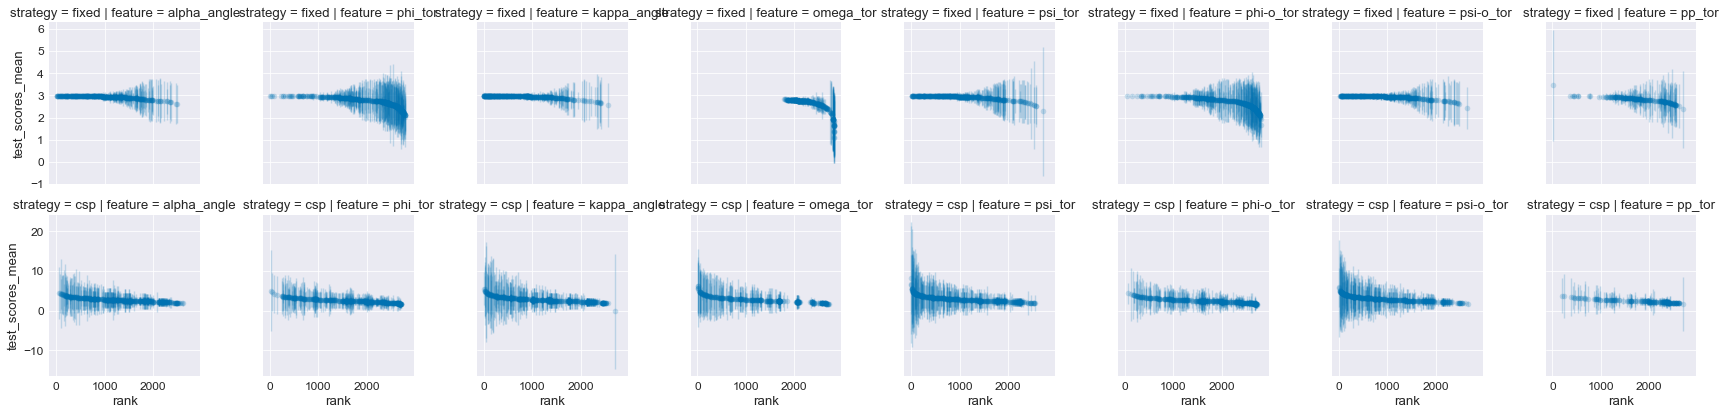

In [262]:
with sns.plotting_context('paper', font_scale=1.5):
    sns.set_palette('colorblind')
    g = sns.FacetGrid(df, row='strategy', col='feature', sharey='row')
    g = g.map(plt.errorbar,'rank',  'test_scores_mean', 'test_scores_error', fmt='o', alpha=0.2)
    